# Configuración Inicial

In [1]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px


[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/luis/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /home/luis/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /home/luis/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/luis/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/luis/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/luis/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /home/luis/nltk_data..

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


#Bi-gramas
* Parejas de palabras que ocurren consecutivas.

In [2]:
# frecuencia de distribucion de la cantidad de veces que aparecen los bigramas
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)

Aqui podemos obtener los bi-gramas más frecuentes en este texto:

In [3]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

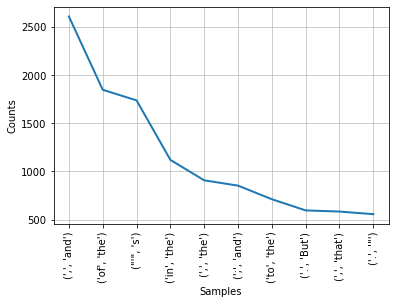

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [4]:
fdist.plot(10)

## Filtrado de bi-gramas
* Sin embargo, observamos que los bi-gramas más comunes no representan realmente frases o estructuras léxicas de interes.
* Tal vez, aplicar algun tipo de filtro nos permita ver estructuras más relevantes.

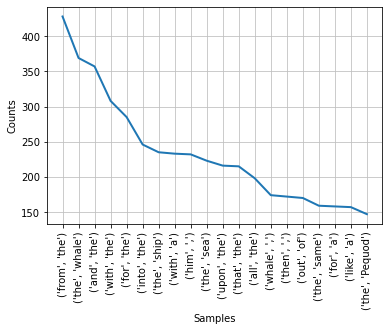

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [5]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0]) > threshold]

filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

## Trigramas

In [6]:
from nltk.util import ngrams

md_trigrams = list(ngrams(text1, 3))

fdist = FreqDist(md_trigrams)
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

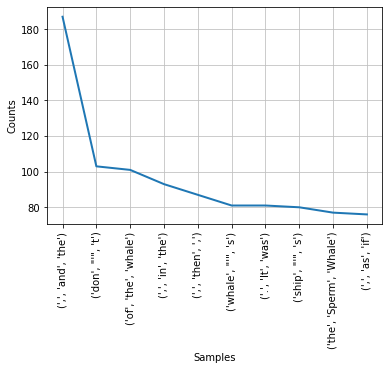

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
fdist.plot(10)

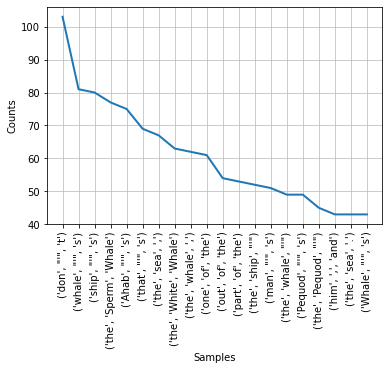

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
threshold = 2
filtered_trigrams = [
    trigram for trigram in md_trigrams if len(trigram[0]) > threshold
]

filtered_dist = FreqDist(filtered_trigrams)
filtered_dist.plot(20)

# Collocations (Colocaciones)

* Son secuencias de palabras que suelen ocurrir en textos o conversaciones con una **frecuencia inusualmente alta** [NLTK doc](http://www.nltk.org/book/ch01.html)
* Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse tipicamente esa palabra [Manning & Schütze, 1990, Foundations of Statistical Natural Language Processing, Capítulo 6](https://nlp.stanford.edu/fsnlp/)

In [22]:
mb_bigrams = list(bigrams(text1))
# mb_bigrams

threshold = 2

filtered_bigrams = [bigram for bigram in mb_bigrams if len(bigram[0]) > threshold and len(bigram[1]) > threshold]
filtered_bigram_dist = FreqDist(filtered_bigrams)

# filtered_bigram_dist

filtered_words = [word for word in text1 if len(word) > threshold]

filtered_words_dist = FreqDist(filtered_words)

df = pd.DataFrame()

df['bi_grams'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_grams'].apply(lambda x: x[0])
df['word_1'] = df['bi_grams'].apply(lambda x: x[1])
df['bi_grams_freq'] = df['bi_grams'].apply(lambda x: filtered_bigram_dist[x])
df['word_0_freq'] =  df['word_0'].apply(lambda x: filtered_words_dist[x])
df['word_1_freq'] =  df['word_1'].apply(lambda x: filtered_words_dist[x])


In [24]:
df

,bi_grams,word_0,word_1,bi_grams_freq,word_0_freq,word_1_freq
0,"(rouse, him)",rouse,him,1,1,1058
1,"(having, stopped)",having,stopped,1,62,8
2,"(probable, that)",probable,that,1,6,2982
3,"(sideways, churning)",sideways,churning,1,27,6
4,"(our, present)",our,present,1,199,80
...,...,...,...,...,...,...
67937,"(well, out)",well,out,1,174,529
67938,"(can, mend)",can,mend,1,220,6
67939,"(moreover, declared)",moreover,declared,1,10,14
67940,"(Was, there)",Was,there,1,11,715


# Pointwise Mutual Information (PMI)

información mutua punto a punto

Una métrica basada en _teoria de la información_ para encontrar **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

la probabilidad de aparicion del bigrama dividido entre la probabilidad de aparicion de cada palabra por separado.

si la PMI calculada es muy grande es porque probablemente es una colocación.

In [29]:
df['PMI'] = df[['bi_grams_freq', 'word_0_freq', 'word_1_freq']].apply(
    lambda x: np.log2(x.values[0] / (x.values[1] * x.values[2])), axis=1)


In [31]:
df['PMI']

0       -10.047124
1        -8.954196
2       -14.127027
3        -7.339850
4       -13.958553
           ...    
67937   -16.490067
67938   -10.366322
67939    -7.129283
67940   -12.941231
67941   -13.671615
Name: PMI, Length: 67942, dtype: float64

In [32]:
df.sort_values(by='PMI', ascending=False)

,bi_grams,word_0,word_1,bi_grams_freq,word_0_freq,word_1_freq,PMI
63037,"(homeless, selves)",homeless,selves,1,1,1,0.000000
25996,"(OPEN, HATCHWAY)",OPEN,HATCHWAY,1,1,1,0.000000
60111,"(occult, lessons)",occult,lessons,1,1,1,0.000000
14217,"(LORD, BACON)",LORD,BACON,1,1,1,0.000000
41507,"(REPEATED, FLASHES)",REPEATED,FLASHES,1,1,1,0.000000
...,...,...,...,...,...,...,...
63147,"(man, the)",man,the,1,508,13721,-22.732783
31709,"(some, the)",some,the,1,578,13721,-22.919024
18705,"(one, the)",one,the,1,889,13721,-23.540138
57851,"(the, not)",the,not,1,13721,1103,-23.851315


# Medidas pre-construidas en NLTK

# Textos en Español 

# Referencias para seguir aprendiendo


*   [Mas sobre Colocaciones con NLTK](http://www.nltk.org/howto/collocations.html)
*   

